
# Fourier Filtering

In this notebook, we will be doing simple filtering operations in an image's Fourier space and observing the results. Let's load the caeraman image and compute the fast Fourier transform. We will explore what the FFT is later, for now imagine it generates a Fourier transform of the image.

In [6]:
##load cameraman image
import numpy as np
from skimage import data

image = data.camera()
#image = image.astype(np.float32) #ensure float values



We now take the FFT of the image and shift the orgin to the center. The shifting to the center is for our benefit only, so we can visualise it better. It is a common operation, so there is a built in function for it.


In [7]:
import scipy.fftpack as fftpack #fft: Fast Fourier Transforms

#compute the FFT
fftImage = fftpack.fft2(image) #2D FFT
fftImage = fftpack.fftshift(fftImage) #shift to the center of space for viewing
powerSpect = np.abs(fftImage) #compute absolute magnitude

In [11]:
powerSpect

array([[  8.      ,  99.93629 , 119.40009 , ...,  79.64251 , 119.40009 ,
         99.93629 ],
       [157.58768 ,  56.527565,  74.90896 , ..., 171.66345 , 173.47096 ,
         46.711426],
       [160.84424 , 137.96509 ,  85.57125 , ...,  16.50944 ,  89.30569 ,
         75.73072 ],
       ...,
       [ 89.82769 ,  66.594055,  57.480865, ...,  77.4174  , 101.59951 ,
         86.49608 ],
       [160.84424 ,  75.73072 ,  89.30569 , ..., 134.70255 ,  85.57125 ,
        137.96509 ],
       [157.58768 ,  46.711426, 173.47096 , ...,  74.84044 ,  74.90896 ,
         56.527565]], dtype=float32)

We now create the actual filters for the job. We will create two masks, one that keeps the low frequencies at a certain distance from the origin (low pass filter) and another that keeps only the high frequencies furthest from the origin beyond a certain distance. The size of the filters is adjusted by the variable radius.

In [8]:
r, c = image.shape
print(image.shape)
N = r
radius = N/8.0
print("radius:", radius)
centerX = r/2
centerY = c/2

#create pass filters
lowPassFilter = np.zeros((r,c))
highPassFilter = np.zeros((r,c))
for indexX, row in enumerate(image):
    for indexY, column in enumerate(image):
        xValue = int(indexX-centerX) #center the index
        yValue = int(indexY-centerY) #center the index
        if (xValue**2 + yValue**2) <= radius**2: #within certain distance
            lowPassFilter[indexX, indexY] = 1.0 #keep low freqs
        else:
            highPassFilter[indexX, indexY] = 1.0 #else keep high freqs

(512, 512)
radius: 64.0


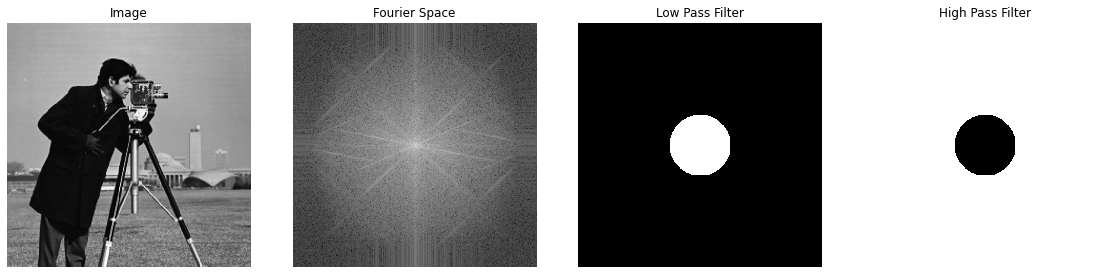

In [9]:
#plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 10))

plt.gray()
plt.tight_layout()

ax[0].imshow(image, interpolation="nearest")
ax[0].axis('off')
ax[0].set_title('Image')
ax[1].imshow(np.log10(powerSpect), interpolation="nearest")
ax[1].axis('off')
ax[1].set_title('Fourier Space')
ax[2].imshow(lowPassFilter, interpolation="nearest")
ax[2].axis('off')
ax[2].set_title('Low Pass Filter')
ax[3].imshow(highPassFilter, interpolation="nearest")
ax[3].axis('off')
ax[3].set_title('High Pass Filter')

plt.show()

Apply the filters to the image via a multiplication in Fourier space. This effectively masks the Fourier coefficients outside the filter range.